## CIFAR 10

* classification (10 classes) 

* CIFAR 10 consists of: 60,000 tiny 32 x 32 color RGB images

* labeled with integer 1 to 10 classes 

* airplane (0), car (1), etc. 

* 50000 -> training, 10000 -> testing

In [1]:
import torch
import numpy as np
## import imageio
import os

import torch.optim as optim
import torch.nn as nn

from torchvision import datasets
from torchvision import transforms

import sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, accuracy_score, f1_score

In [2]:
data_path = 'data/cifar10data/'

cifar10 = datasets.CIFAR10(data_path, train=True, download=True)

Files already downloaded and verified


In [3]:
cifar10_test = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified


In [4]:
cifar10 = datasets.CIFAR10(data_path, train=True, download=False)

In [5]:
print(cifar10)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: data/cifar10data/
    Split: Train


In [6]:
img, label = cifar10[79]

In [7]:
label

1

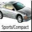

In [8]:
img

In [9]:
print(   dir(transforms)   )

['AugMix', 'AutoAugment', 'AutoAugmentPolicy', 'CenterCrop', 'ColorJitter', 'Compose', 'ConvertImageDtype', 'ElasticTransform', 'FiveCrop', 'GaussianBlur', 'Grayscale', 'InterpolationMode', 'Lambda', 'LinearTransformation', 'Normalize', 'PILToTensor', 'Pad', 'RandAugment', 'RandomAdjustSharpness', 'RandomAffine', 'RandomApply', 'RandomAutocontrast', 'RandomChoice', 'RandomCrop', 'RandomEqualize', 'RandomErasing', 'RandomGrayscale', 'RandomHorizontalFlip', 'RandomInvert', 'RandomOrder', 'RandomPerspective', 'RandomPosterize', 'RandomResizedCrop', 'RandomRotation', 'RandomSolarize', 'RandomVerticalFlip', 'Resize', 'TenCrop', 'ToPILImage', 'ToTensor', 'TrivialAugmentWide', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_functional_pil', '_functional_tensor', '_presets', 'autoaugment', 'functional', 'transforms']


In [10]:
print(img)

<PIL.Image.Image image mode=RGB size=32x32 at 0x12F795F10>


In [11]:
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)

print(img_t.shape)

torch.Size([3, 32, 32])


The transforms can be passed directly to tnhe entire dataset

In [12]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.ToTensor())

In [13]:
img_t , label = tensor_cifar10[99]

In [14]:
print(label)
print(img_t)

1
tensor([[[0.2431, 0.1961, 0.1804,  ..., 0.6549, 0.7176, 0.5373],
         [0.2471, 0.2157, 0.2039,  ..., 0.6392, 0.6706, 0.5686],
         [0.2275, 0.2510, 0.2196,  ..., 0.6000, 0.5882, 0.4824],
         ...,
         [0.6745, 0.5608, 0.5098,  ..., 0.3686, 0.5529, 0.5451],
         [0.7176, 0.5882, 0.3137,  ..., 0.3176, 0.5294, 0.5608],
         [0.8196, 0.7137, 0.5451,  ..., 0.2314, 0.5098, 0.6627]],

        [[0.2510, 0.1961, 0.1725,  ..., 0.6745, 0.7216, 0.5333],
         [0.2549, 0.2078, 0.1961,  ..., 0.6627, 0.6824, 0.5725],
         [0.2431, 0.2588, 0.2353,  ..., 0.6078, 0.6039, 0.5020],
         ...,
         [0.5294, 0.4314, 0.2196,  ..., 0.2941, 0.4235, 0.4118],
         [0.5725, 0.4627, 0.2510,  ..., 0.2824, 0.4627, 0.4902],
         [0.6824, 0.5922, 0.4275,  ..., 0.2118, 0.4667, 0.6118]],

        [[0.1725, 0.1020, 0.0745,  ..., 0.2706, 0.2980, 0.2824],
         [0.1451, 0.1020, 0.1059,  ..., 0.2392, 0.2941, 0.3020],
         [0.1412, 0.1451, 0.1451,  ..., 0.2431, 0.2510, 

## Normalize



In [15]:

imgs_list = [ img_t for img_t, label in tensor_cifar10 ]

imgs = torch.stack( imgs_list, dim=3 )

imgs_list[7].shape

torch.Size([3, 32, 32])

In [16]:
print(imgs.shape)

torch.Size([3, 32, 32, 50000])


In [17]:
view_means = imgs.view(3, -1)
print(view_means.shape)

torch.Size([3, 51200000])


In [18]:
view_means = view_means.mean(dim=1)
print(view_means)

tensor([0.4914, 0.4822, 0.4465])


In [19]:
view_std_dev = imgs.view(3, -1).std(dim=1)
print(view_std_dev)

tensor([0.2470, 0.2435, 0.2616])


In [20]:
transformed_cifar10_train = datasets.CIFAR10(data_path, train=True, download= False,
                                          transform = transforms.Compose(
                                              [
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(view_means, view_std_dev)
                                              ]
                                          )
                                      )

In [21]:
# pixel = pixel - mean/std #Normalization

transformed_cifar10_test = datasets.CIFAR10(data_path, train=False, download= False,
                                          transform = transforms.Compose(
                                              [
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(view_means, view_std_dev)
                                              ]
                                          )
                                      )


## Build dataset

In [22]:
# label_map = {0:0, 2:1}

In [23]:
# cifar_train = [(img, label_map[label]) for img, label in transformed_cifar10_train if label in [0,2]]
cifar_train = [(img, label) for img, label in transformed_cifar10_train]

In [24]:
# cifar_test = [(img, label_map[label]) for img, label in transformed_cifar10_test if label in [0,2]]
cifar_test = [(img, label) for img, label in transformed_cifar10_test]

## Softmax

In [25]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [26]:
x = torch.tensor([1.0, 4.0, 3.0 ])
x

tensor([1., 4., 3.])

In [27]:
# x = torch.exp(x);
# x = x/x.sum()
# x

In [28]:
print(softmax(x))

tensor([0.0351, 0.7054, 0.2595])



## Architectures


In [29]:
model_mlp = nn.Sequential(
          nn.Linear(3072, 200),
          nn.Tanh(),
          nn.Linear(200, 10),
          nn.Softmax(dim=1)
)

In [31]:

model_3DL = nn.Sequential(
     nn.Linear(3072, 2048),
     nn.ReLU(),
     nn.Linear(2048, 1024),
     nn.GELU(),
     nn.Linear(1024, 512),
     nn.ReLU(),
     nn.Linear(512, 128),
     nn.ReLU(),
     nn.Linear(128, 10),
     nn.LogSoftmax(dim=1)
)



## DataLoader


In [32]:

train_loader = torch.utils.data.DataLoader(cifar_train, batch_size=64, shuffle=True)


In [33]:

# model_fn = model_mlp
model_fn = model_3DL


## Training process

In [34]:
n_epochs = 50
learning_rate = 0.001  ## 1e-2    ## 0.001
optimizer = optim.Adam(  model_fn.parameters(), lr=learning_rate )

# optimizer = optim.SGD(  model_fn.parameters(), lr=learning_rate )

loss_fn = nn.CrossEntropyLoss()

In [ ]:

for epoch in range(n_epochs):
    for imgs, labels in train_loader:       ## imgs [batch_sizex3x32x32 = 3*1024]
        ## print(imgs.shape)
        ## resize for network
        batch_size = imgs.shape[0]
        imgs_resized = imgs.view(batch_size, -1)    ## imgs_resized [batch_size, 3072]
        ## print(imgs_resized.shape)
        outputs = model_fn(imgs_resized)
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        print(loss)

print("Finished Training")

## Testing after Training

In [46]:

test_DataLoader = torch.utils.data.DataLoader(cifar_test, batch_size=64, shuffle=False)


In [47]:

with torch.no_grad():
    for imgs, labels in test_DataLoader:
        batch_size = imgs.shape[0]
        outputs    = model_fn(    imgs.view(batch_size, -1)     )
        vals, indices = torch.max(outputs, dim=1)
        preds = indices
        metric = (preds == labels).sum()
        total = batch_size

print(metric/total)


tensor(0.4375)


## All performance metrics

In [60]:
def getF1(algo_name, y_test, y_pred):
    return f1_score(y_true=y_test, y_pred=y_pred, average='weighted')

def print_stats_percentage_train_test(algorithm_name, y_test, y_pred):    
     print("algorithm is: ", algorithm_name)
     print('Accuracy: %.2f' % accuracy_score(y_test,   y_pred) )
     confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
     print("confusion matrix")
     print(confmat)
     print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average='weighted'))
     print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average='weighted'))
     print('F1-measure: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average='weighted'))
   

In [62]:

with torch.no_grad():
    maxf1 = 0
    max_y_test = []
    max_y_pred = []
    for imgs, labels in test_DataLoader:
        batch_size = imgs.shape[0]
        outputs    = model_fn(    imgs.view(batch_size, -1)     )
        vals, preds = torch.max(  outputs, dim=1  )
        f1 = getF1("4DL",labels, preds)
        if(f1>maxf1):
            maxf1 = f1
            max_y_test = labels
            max_y_pred = preds

    print("Max F1-Measure: "+str(maxf1))
    print_stats_percentage_train_test("4DL", max_y_test, max_y_pred)

Max F1-Measure: 0.7422488306219923
algorithm is:  4DL
Accuracy: 0.75
confusion matrix
[[3 0 1 0 0 0 0 0 1 0]
 [0 4 0 0 0 0 0 0 0 1]
 [1 0 3 0 1 2 0 0 0 0]
 [0 0 0 3 1 1 1 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 1 0 0 8 0 0 0 0]
 [0 0 0 1 0 0 2 0 0 0]
 [0 0 1 0 0 1 0 6 0 1]
 [0 0 0 0 0 0 0 0 7 0]
 [0 0 0 0 0 0 0 1 0 7]]
Precision: 0.756
Recall: 0.750
F1-measure: 0.742
